In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy.stats as stats
from palmerpenguins import load_penguins

In [21]:
penguins = sns.load_dataset("penguins")
print(penguins.head())
penguins = penguins.dropna()

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


KeyError: "None of [Index([1], dtype='int32')] are in the [columns]"

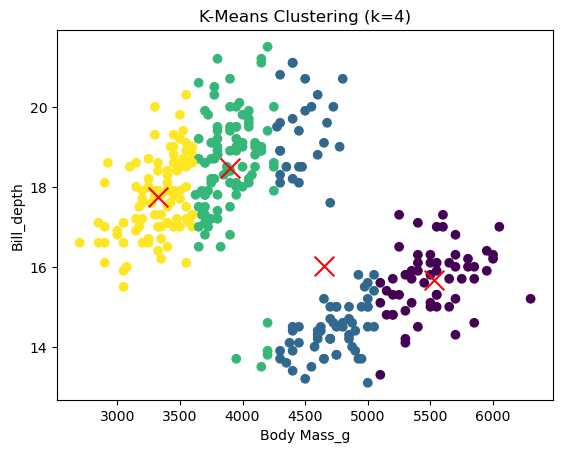

Cluster Centroids:
[[5525.           15.67068966]
 [4647.89156627   16.01325301]
 [3900.           18.47040816]
 [3324.73404255   17.74255319]]


In [31]:

# Define the number of clusters (k)
k = 4

# Assuming you have a 'penguins' DataFrame with a 'bill_length_mm' column
# Make sure to use the actual column names from your DataFrame
data = penguins[['body_mass_g', 'bill_depth_mm']]  # Replace 'another_column_name' with the correct column name

# Perform k-means clustering
centroids, _ = kmeans(data, k)

# Assign each data point to a cluster
cluster_ids, _ = vq(data, centroids)

# Plot the data points and cluster centroids
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=cluster_ids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('Body Mass_g')
plt.ylabel('Bill_depth')
plt.show()

# Print the cluster centroids
print("Cluster Centroids:")
print(centroids)


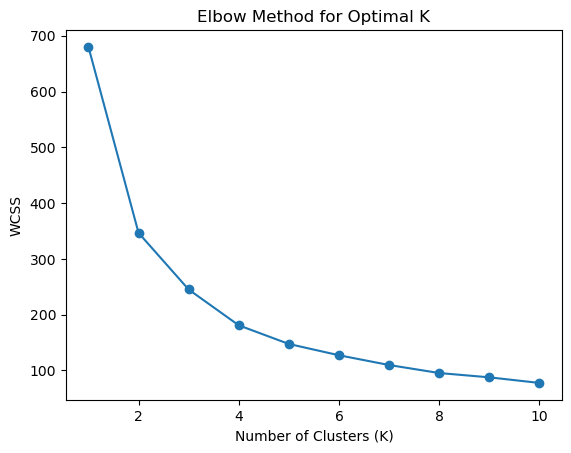

In [30]:
data = penguins[['bill_length_mm', 'body_mass_g']]  # Replace 'another_column_name' with the correct column name

# Determine the optimal K using the Elbow Method
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):  # Try different values of K
    centroids, distortion = kmeans(data, k)
    wcss.append(distortion)

# Plot the WCSS values
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()